In [1]:
from korrelation_functions import *

# EKG

In [3]:
filename = r'echtzeit-spiroergo-05-20250522-1732.ecg'
data, log_start_time = read_ecg(filename)

LogStartMDHTime: 63167070
Uhrzeit EKG Beginn: 17:32:47


# Spiro

In [14]:
filename_spiro = "05_22_5_2025_17_46raw.log"
spiro_resorted = read_spiro_data(filename_spiro)

# Korrelation ECG

FloatRangeSlider(value=(0.0, 3000.0), description='X-R', layout=Layout(width='100%'), max=4339.1925, step=2.0)

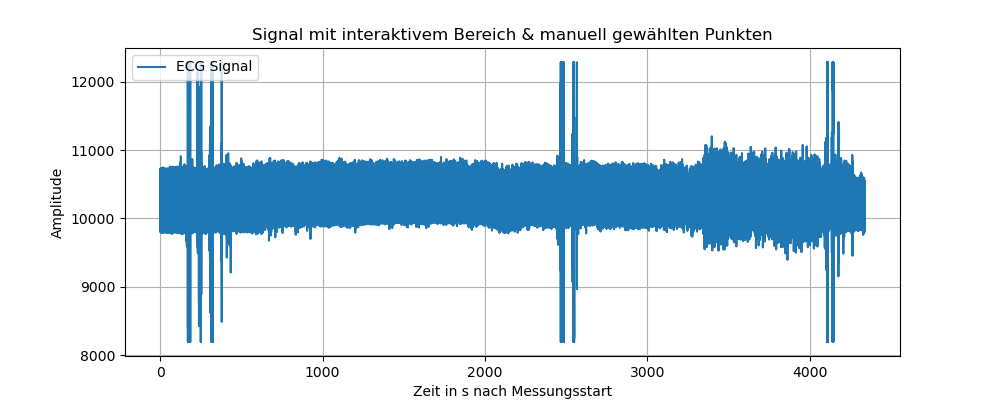

In [10]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
# Interaktive Darstellung in Jupyter

#Wie viel Prozent vom Datensatz willst du sehen? Optimal, um feinere Punkte zu sehen
perc = 0
perc_end = 1
# Beispiel-Daten für das Signal
y_data = data[6::4]
perc_datenpunkt = int(perc * len(y_data))
perc_datenpunkt_end = int(perc_end * len(y_data))
y_data = y_data[perc_datenpunkt:perc_datenpunkt_end]
x_data = np.arange(len(y_data)) * 0.0025

# Liste für gespeicherte Punkte
time_stamp_ecg = []

# Default X-Range für den Slider
x_min, x_max = 0, 3000

def find_nearest_point(x_click):
    """Findet den nächsten X-Wert in den Daten und gibt X und Y zurück."""
    idx = (np.abs(x_data - x_click)).argmin()  # Index des nächsten Punktes
    return idx, y_data[idx]

def onclick(event):
    """Setzt einen Punkt an der nächstgelegenen X-Position der Daten."""
    if event.xdata is not None and event.ydata is not None:
        nearest_x, nearest_y = find_nearest_point(event.xdata)
        time_stamp_ecg.append((nearest_x, nearest_y))
        print(f"Punkt gesetzt bei: ({nearest_x:.2f}, {nearest_y:.2f})")
        update_plot()

def update_plot(change=None):
    """Zeichnet das Signal mit allen gesetzten Punkten neu."""
    ax.clear()  # Löscht den aktuellen Plot
    ax.plot(x_data, y_data, label="ECG Signal")
    
    # Alle gespeicherten Punkte einzeichnen
    if time_stamp_ecg:
        x_pts, y_pts = zip(*time_stamp_ecg)  # Listen mit X- und Y-Werten
        ax.scatter(x_data[x_pts], y_pts, color="red", s=100, label="Manuelle Punkte")

    ax.set_xlim(x_range_slider.value)  # X-Range basierend auf Slider setzen
    ax.legend()
    ax.set_xlabel("Zeit in s nach Messungsstart")
    ax.set_ylabel("Amplitude")
    ax.set_title("Signal mit interaktivem Bereich & manuell gewählten Punkten")
    ax.grid(True)
    fig.canvas.draw()  # Aktualisiert den Plot

def initialize_plot():
    """Zeichnet das Signal mit allen gesetzten Punkten neu."""
    ax.clear()  # Löscht den aktuellen Plot
    ax.plot(x_data, y_data, label="ECG Signal")
    
    # Alle gespeicherten Punkte einzeichnen
    if time_stamp_ecg:
        x_pts, y_pts = zip(*time_stamp_ecg)  # Listen mit X- und Y-Werten
        ax.scatter(x_pts, y_pts, color="red", s=100, label="Manuelle Punkte")

    #ax.set_xlim(x_range_slider.value)  # X-Range basierend auf Slider setzen
    ax.legend()
    ax.set_xlabel("Zeit in s nach Messungsstart")
    ax.set_ylabel("Amplitude")
    ax.set_title("Signal mit interaktivem Bereich & manuell gewählten Punkten")
    ax.grid(True)
    fig.canvas.draw()  # Aktualisiert den Plot

# Erstellt die Figur mit figsize (16, 4)
fig, ax = plt.subplots(figsize=(10, 4))
initialize_plot()
#update_plot()

# Event-Listener für Mausklicks hinzufügen
fig.canvas.mpl_connect("button_press_event", onclick)



# Erstelle interaktiven Slider für X-Range
x_range_slider = widgets.FloatRangeSlider(
    value=[x_min, x_max], 
    min=0, 
    # Bis zu welchem Datenpunkt wird gezeigt -> es soll alles gezeigt werden
    max=x_data[-1], 
    step=2, 
    description='X-R',
    layout=widgets.Layout(width='100%')
)

# Aktualisiert den Plot, wenn sich der Slider bewegt
x_range_slider.observe(update_plot, names='value')

# Zeigt den Slider an
display(x_range_slider)

FloatRangeSlider(value=(0.0, 1911.0240000000001), description='X-Range:', layout=Layout(width='100%'), max=191…

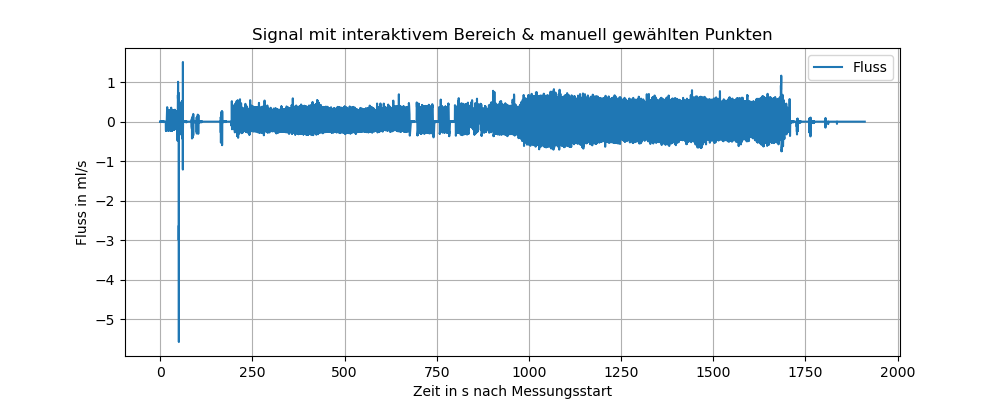

In [16]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# wie viel prozent soll angezeigt werden
perc = 1
# Beispiel-Daten für das Signal
y_data = spiro_resorted[1]
perc_datenpunkt = int(perc * len(y_data))
y_data = y_data[:perc_datenpunkt] 
x_data = np.arange(len(y_data)) * 0.008
# Liste für gespeicherte Punkte
clicked_points = []

# Default X-Range für den Slider
x_min, x_max = 0, x_data[-1]

def find_nearest_point(x_click):
    """Findet den nächsten X-Wert in den Daten und gibt X und Y zurück."""
    idx = (np.abs(x_data - x_click)).argmin()  # Index des nächsten Punktes
    return idx, y_data[idx]

def onclick(event):
    """Setzt einen Punkt an der nächstgelegenen X-Position der Daten."""
    if event.xdata is not None and event.ydata is not None:
        nearest_x, nearest_y = find_nearest_point(event.xdata)
        clicked_points.append((nearest_x, nearest_y))
        print(f"Punkt gesetzt bei: ({nearest_x:.2f}, {nearest_y:.2f})")
        update_plot()

def update_plot(change=None):
    """Zeichnet das Signal mit allen gesetzten Punkten neu."""
    ax.clear()  # Löscht den aktuellen Plot
    ax.plot(x_data, y_data, label="Fluss")
    
    # Alle gespeicherten Punkte einzeichnen
    if clicked_points:
        x_pts, y_pts = zip(*clicked_points)  # Listen mit X- und Y-Werten
        ax.scatter(x_data[x_pts], y_pts, color="red", s=100, label="Manuelle Punkte")

    ax.set_xlim(x_range_slider.value)  # X-Range basierend auf Slider setzen
    ax.legend()
    ax.set_xlabel("Zeit in s nach Messungsstart")
    ax.set_ylabel("Fluss in ml/s")
    ax.set_title("Signal mit interaktivem Bereich & manuell gewählten Punkten")
    ax.grid(True)
    fig.canvas.draw()  # Aktualisiert den Plot

def initialize_plot():
    """Zeichnet das Signal mit allen gesetzten Punkten neu."""
    ax.clear()  # Löscht den aktuellen Plot
    ax.plot(x_data, y_data, label="Fluss")
    
    # Alle gespeicherten Punkte einzeichnen
    if clicked_points:
        x_pts, y_pts = zip(*clicked_points)  # Listen mit X- und Y-Werten
        ax.scatter(x_pts, y_pts, color="red", s=100, label="Manuelle Punkte")

    ax.legend()
    ax.set_xlabel("Zeit in s nach Messungsstart")
    ax.set_ylabel("Fluss in ml/s")
    ax.set_title("Signal mit interaktivem Bereich & manuell gewählten Punkten")
    ax.grid(True)
    fig.canvas.draw()  # Aktualisiert den Plot


# Erstellt die Figur mit figsize (16, 4)
fig, ax = plt.subplots(figsize=(10, 4))
initialize_plot()
#update_plot()

# Event-Listener für Mausklicks hinzufügen
fig.canvas.mpl_connect("button_press_event", onclick)

# Erstelle interaktiven Slider für X-Range
x_range_slider = widgets.FloatRangeSlider(
    value=[x_min, x_max], 
    min=0, 
    max=x_data[-1], 
    step=1, 
    description='X-Range:',
    layout=widgets.Layout(width='100%')
)

# Aktualisiert den Plot, wenn sich der Slider bewegt
x_range_slider.observe(update_plot, names='value')

# Zeigt den Slider an
display(x_range_slider)


In [14]:
# Berechnung aller Werte

In [18]:
print(clicked_points)
print(time_stamp_ecg)

time_stamp_spiro = clicked_points[0][0] # Dieser Wert muss noch mal 0.008 für ms gerechnet werden, da dies der Index ist
timestamp_ecg = time_stamp_ecg[0][0]
print(f"Spiro-Timestamp: {time_stamp_spiro} und EKG-Timestamp: {timestamp_ecg}")
print(f"EKG Beginn: {log_start_time}")
real_time_ecg = timeConverter(log_start_time)
print(f"Uhrzeit EKG Beginn: {real_time_ecg}")
time_format = "%H:%M:%S"

# Spiro Abtastrate von 8ms, EKG 2.5ms, 
# Wandle Timestamp in 
ecg_real_time_time_stamp = (2.5 / 1000) * timestamp_ecg
print(f"Zeit nach Beginn bis Timestamp vom EKG: {ecg_real_time_time_stamp} s")

# Uhrzeit von log_start_time
time_object = datetime.strptime(real_time_ecg, time_format)
new_time = time_object + timedelta(seconds=ecg_real_time_time_stamp)

print("Zeit EKG Timestamp:", new_time.strftime("%H:%M:%S"))

sr_ecg = 0.0025
sr_spiro = 0.008
ecg_from_timestamp = data[6::4][timestamp_ecg:]
spiro_from_timestamp = spiro_resorted[1][time_stamp_spiro:]

# Zeitachsen erzeugen
time_ecg = np.arange(0, len(ecg_from_timestamp) * sr_ecg, sr_ecg)
time_spiro = np.arange(0, len(spiro_from_timestamp) * sr_spiro, sr_spiro)

# Falls durch Rundung eine Länge zu groß wird, anpassen:
time_ecg = time_ecg[:len(ecg_from_timestamp)]
time_spiro = time_spiro[:len(spiro_from_timestamp)]

scaling_factor = 1500 # EKG y Daten zu groß, passe es auf das Spirosignal an
mean_ecg = np.mean(ecg_from_timestamp)
mod_ecg_data = [((y - mean_ecg)/scaling_factor) + 1 for y in ecg_from_timestamp]

[(10704, 0.0)]
[(986525, 10130)]
Spiro-Timestamp: 10704 und EKG-Timestamp: 986525
EKG Beginn: 63167070
Uhrzeit EKG Beginn: 17:32:47
Zeit nach Beginn bis Timestamp vom EKG: 2466.3125 s
Zeit EKG Timestamp: 18:13:53


FloatRangeSlider(value=(0.0, 1825.32), description='X', layout=Layout(width='120%'), max=1825.32, step=1.0)

Start EKG
Zeit EKG Timestamp: 18:13:53.312
Zeit nach Beginn bis Timestamp vom EKG: 2466.3125 s
Spiro-Timestamp: 10704 und in s: 85.632


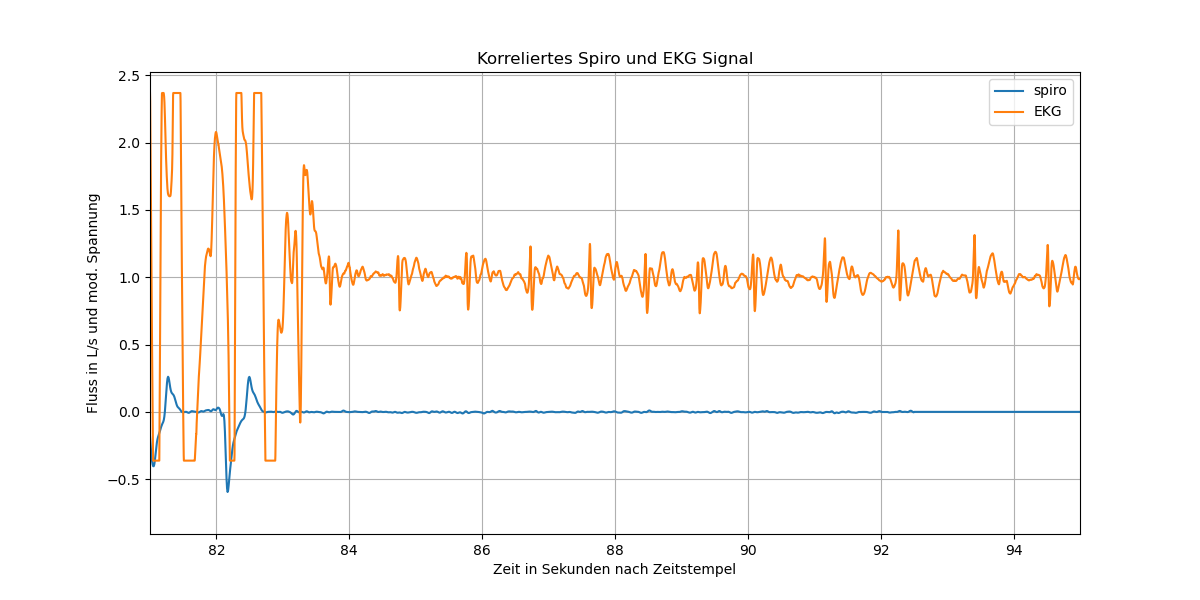

In [20]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

  # Interaktive Darstellung in Jupyter

# Beispiel-Daten für das Signal
#y_data = data[5::4]
#x_data = np.arange(len(y_data))  # X-Werte von 0 bis 1000


# Default X-Range für den Slider
x_min, x_max = 0, time_spiro[-1]


def update_plot(change=None):
    """Zeichnet das Signal mit allen gesetzten Punkten neu."""
    ax.clear()  # Löscht den aktuellen Plot
    ax.plot(time_spiro, spiro_from_timestamp, label = "spiro")
    ax.plot(time_ecg, mod_ecg_data, label = "EKG")
    ax.set_xlim(x_range_slider.value)  # X-Range basierend auf Slider setzen
    ax.legend()
    ax.set_xlabel("Zeit in Sekunden nach Zeitstempel")
    ax.set_ylabel("Fluss in L/s und mod. Spannung")
    ax.set_title("Korreliertes Spiro und EKG Signal")
    ax.grid(True)
    fig.canvas.draw()  # Aktualisiert den Plot

# Erstellt die Figur mit figsize (16, 4)
fig, ax = plt.subplots(figsize=(12, 6))
update_plot()


# Erstelle interaktiven Slider für X-Range
x_range_slider = widgets.FloatRangeSlider(
    value=[x_min, x_max], 
    min=0, 
    max=time_spiro[-10], 
    step=1, 
    description='X',
    layout=widgets.Layout(width='120%')
)

# Aktualisiert den Plot, wenn sich der Slider bewegt
x_range_slider.observe(update_plot, names='value')

# Zeigt den Slider an
display(x_range_slider)
print("Start EKG")
print("Zeit EKG Timestamp:", new_time.strftime("%H:%M:%S.") + f"{new_time.microsecond // 1000:03}")
print(f"Zeit nach Beginn bis Timestamp vom EKG: {ecg_real_time_time_stamp} s")
print(f"Spiro-Timestamp: {time_stamp_spiro} und in s: {time_stamp_spiro * 0.008}")


# Gibt uns die Zeiten:
- Zeit-Start-EKG nach Spiro in ms
- Uhrzeit korrelierter Daten nach Zeitstempel
- Datenpunkte vom Zeitstempel
- Zeit Zeitstempel in ms nach Mitternacht !!!

Was wurde genau gemacht? Es wurde einen gemeinsamen Zeitpunkt in den Daten festgelegt, wo beide zur selben Zeit anfangen.
Die Zeiten werden um diese Zeiten nach hinten verschoben, sodass bei 0, bei beiden 

In [22]:
spiro_vol = get_volume_from_flow(spiro_resorted[1])
# Speicher der Indizes, wo die Messung startet
indizes = [timestamp_ecg, time_stamp_spiro]
import numpy as np
np.save('ecg.npy', mod_ecg_data)
np.save('spiro.npy', spiro_vol)
np.save('indizes.npy', indizes)

611
5
